In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [6]:
path1='C:\\Users\\mithu\\Desktop\\VIT Projects\\MRI Analysis\\archive\\brain_tumor_dataset\\no'
path2='C:\\Users\\mithu\\Desktop\\VIT Projects\\MRI Analysis\\archive\\brain_tumor_dataset\\yes'
files1=os.listdir(path1)
files2=os.listdir(path2)
Num_files_N=len(files1)
Num_files_T=len(files2)
dataset_len=Num_files_N+Num_files_T

In [7]:
data=np.zeros((dataset_len,224,224,3))
label=[]
data.shape

(252, 224, 224, 3)

In [8]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.resize(img,(224,224))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(224,224,3)
    data[i,:,:]=img_gs
    label.append('Normal')


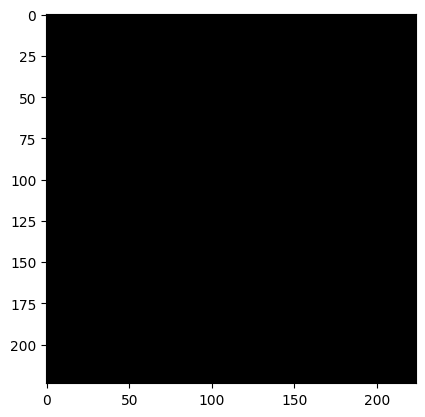

In [9]:
plt.imshow(data[100],cmap='gray')

In [10]:
for i in range(Num_files_T):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.resize(img,(224,224))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(224,224,3)
    data[i+Num_files_N,:,:]=img_gs
    label.append('Tumor')

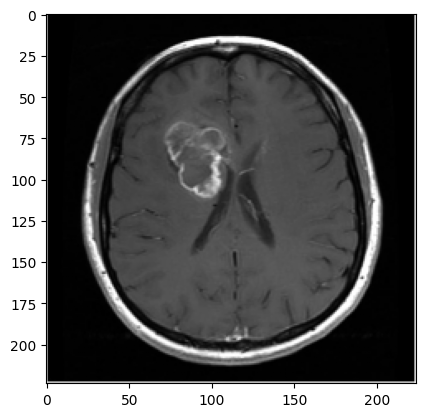

In [11]:
plt.imshow(data[100],cmap='gray')

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [13]:
train_images,test_images,train_labels,test_labels=train_test_split(data,lab,test_size=0.2,random_state=1)

In [14]:
print('Train Dataset Size:',np.size(train_labels))
print('Test Dataset Size:',np.size(test_labels))

Train Dataset Size: 201
Test Dataset Size: 51


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


In [16]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=train_images[0].shape)
base_model.trainable=False

In [17]:
train_ds=tf.image.resize(train_images,(224,224))
test_ds=tf.image.resize(test_images,(224,224))

In [18]:
train_ds=preprocess_input(train_images)
test_ds=preprocess_input(test_images)

In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
from tensorflow.keras import layers, models

In [21]:
flatten_layer=layers.Flatten()
dense_1=layers.Dense(50,activation='relu')
dense_2=layers.Dense(20,activation='relu')
pred_layer=layers.Dense(3,activation='softmax')

In [22]:
networks=models.Sequential([
    base_model,
    flatten_layer,
    dense_1,
    dense_2,
    pred_layer
])

In [23]:
networks.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 15,970,221
Trainable params: 1,255,533
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
networks.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
             )

In [25]:
trained_net=networks.fit(train_ds,train_labels,epochs=10,validation_data=(test_ds,test_labels),batch_size=64)

Epoch 1/10
4/4 [==============================] - 64s 14s/step - loss: 3.0625 - accuracy: 0.4129 - val_loss: 0.7410 - val_accuracy: 0.5490
Epoch 2/10
4/4 [==============================] - 54s 14s/step - loss: 0.6637 - accuracy: 0.6020 - val_loss: 0.6476 - val_accuracy: 0.6078
Epoch 3/10
4/4 [==============================] - 54s 14s/step - loss: 0.6415 - accuracy: 0.6567 - val_loss: 0.6583 - val_accuracy: 0.6078
Epoch 4/10
4/4 [==============================] - 54s 13s/step - loss: 0.5966 - accuracy: 0.6816 - val_loss: 0.5921 - val_accuracy: 0.7843
Epoch 5/10
4/4 [==============================] - 55s 14s/step - loss: 0.6111 - accuracy: 0.7015 - val_loss: 0.5955 - val_accuracy: 0.6275
Epoch 6/10
4/4 [==============================] - 56s 14s/step - loss: 0.5747 - accuracy: 0.6866 - val_loss: 0.5470 - val_accuracy: 0.7843
Epoch 7/10
3/4 [=====================>........] - ETA: 14s - loss: 0.6097 - accuracy: 0.6458

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=train_images[0].shape)
base_model.trainable=False

In [ ]:
for layer in base_model.layers[15:]:
    layer.trainable=True

In [ ]:
for layer in base_model.layers:
    print("{}:{}".format(layer, layer.trainable))

<keras.src.engine.input_layer.InputLayer object at 0x000001867D78C510>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001867C6632D0>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001867D795CD0>:False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000018612A9D090>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001867C6BD350>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000018613277210>:False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001861324BF10>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000018612A95F90>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000018612AB2E10>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001861321EC50>:False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000018612B790D0>:False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000018613275850>:False


In [ ]:
model=models.Sequential([
    base_model,
    flatten_layer,
    dense_1,
    dense_2,
    pred_layer
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 15970221 (60.92 MB)
Trainable params: 1255533 (4.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
             )

In [ ]:
trained_model=model.fit(train_ds,train_labels, epochs=10, validation_data=(test_ds,test_labels),batch_size=64)

Epoch 1/5
4/4 [==============================] - 103s 25s/step - loss: 0.6691 - accuracy: 0.6318 - val_loss: 0.7049 - val_accuracy: 0.5490
Epoch 2/5
4/4 [==============================] - 78s 18s/step - loss: 0.6581 - accuracy: 0.6567 - val_loss: 0.6581 - val_accuracy: 0.5686
Epoch 3/5
4/4 [==============================] - 57s 14s/step - loss: 0.6215 - accuracy: 0.6368 - val_loss: 0.6753 - val_accuracy: 0.5686
Epoch 4/5
4/4 [==============================] - 54s 14s/step - loss: 0.6197 - accuracy: 0.6517 - val_loss: 0.6280 - val_accuracy: 0.6275
Epoch 5/5
4/4 [==============================] - 55s 14s/step - loss: 0.6238 - accuracy: 0.6965 - val_loss: 0.6139 - val_accuracy: 0.6667


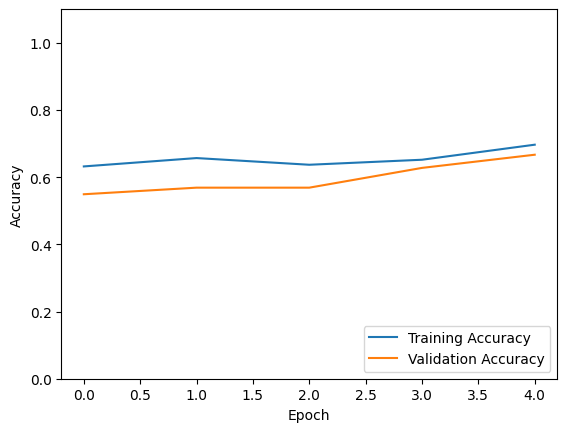

In [ ]:
import matplotlib.pyplot as plt
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

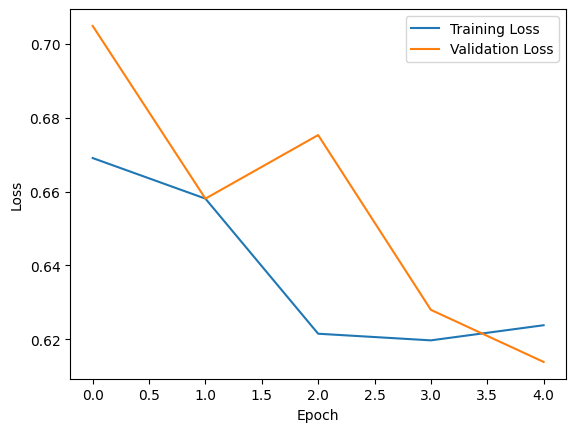

In [ ]:
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

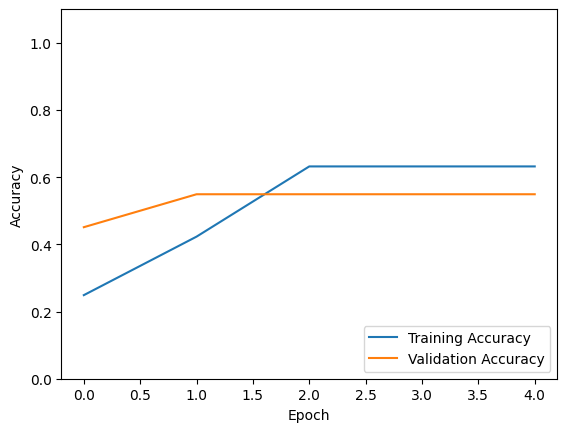

In [ ]:
plt.plot(trained_net.history['accuracy'],label='Training Accuracy')
plt.plot(trained_net.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

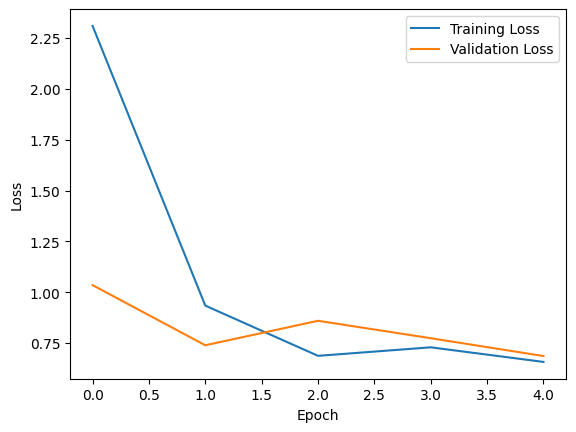

In [ ]:
plt.plot(trained_net.history['loss'],label='Training Loss')
plt.plot(trained_net.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

2/2 [==============================] - 11s 4s/step - loss: 0.6727 - accuracy: 0.5686


In [ ]:
test_images.shape

(51, 224, 224, 3)

In [ ]:
test=np.zeros((1,224,224,3))

In [ ]:
y_predict=model.predict(test_images)

2/2 [==============================] - 13s 6s/step


In [ ]:
y_predict.shape

(51, 3)

In [ ]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [ ]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(test_labels,y_pred))

Confusion Matrix:
[[ 1 22]
 [ 0 28]]


In [ ]:
print('Classifier Accuracy:')
print(metrics.accuracy_score(test_labels,y_pred))

Classifier Accuracy:
0.5686274509803921


Text(0, 0.5, 'True Positive Rate')

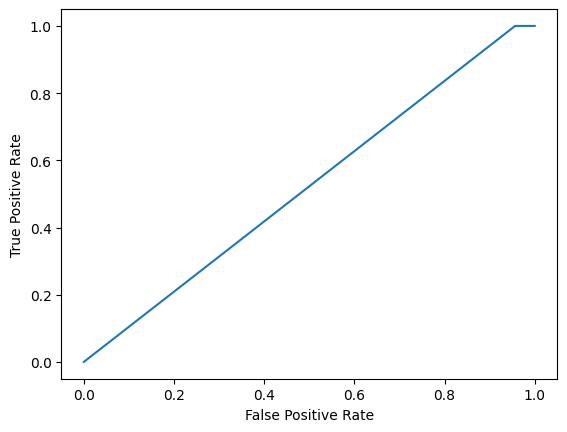

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels,y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
test_images.shape

(51, 224, 224, 3)

In [ ]:
test=np.zeros((1,224,224,3))

In [ ]:
img=cv.imread('C:\\Users\\mithu\\Desktop\\VIT Projects\\MRI Analysis\\archive\\yes\\Y1.jpg')
img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_gs=cv.resize(img_gs,(224,224))
img_gs=img_gs.reshape(224,224,1)
img_gs=img_gs/255
test[0,:,:]=img_gs

In [ ]:
test[0].shape

(224, 224, 3)

In [ ]:
np.argmax(model.predict(test))

1/1 [==============================] - 0s 353ms/step


1